# **SALES FORCASTIGN DESCRIPTION**

In [146]:
#!pip install xgboost lightgbm gradio --quiet

print("Required libraries installed successfully.")

Required libraries installed successfully.


## **Importing Libraries**

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
import gradio as gr
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


## **Loading Dataset**

In [148]:
# Kaggle download URL: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
import pandas as pd

csv_path = '/content/drive/MyDrive/(( Internships Summer 2025 ))/Elovve Pathways Projects/Task 3: Sales Forcasting Description/sales_data_sample.csv'  # Update if needed

try:
    data = pd.read_csv(csv_path, encoding='ISO-8859-1')
    print("Dataset loaded successfully with ISO-8859-1 encoding.\n")
except Exception as e:
    print("Error loading dataset:", e)

# Display first 5 rows
data.head()

Dataset loaded successfully with ISO-8859-1 encoding.



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## **Exploring Dataset**

In [150]:
print("📊 Dataset Info:")
print(data.info())
print("\n\n__________________________________________________________________________\n__________________________________________________________________________\n\n")
print("\n🧮 Dataset Description:")
print(data.describe())

print("\n\n__________________________________________________________________________\n__________________________________________________________________________\n\n")
print("\n🔍 Missing Values Check:")
print(data.isnull().sum())
print("\n\n__________________________________________________________________________\n__________________________________________________________________________\n\n")

# Check column names
print(data.columns)

print("\n\n__________________________________________________________________________\n__________________________________________________________________________")

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-

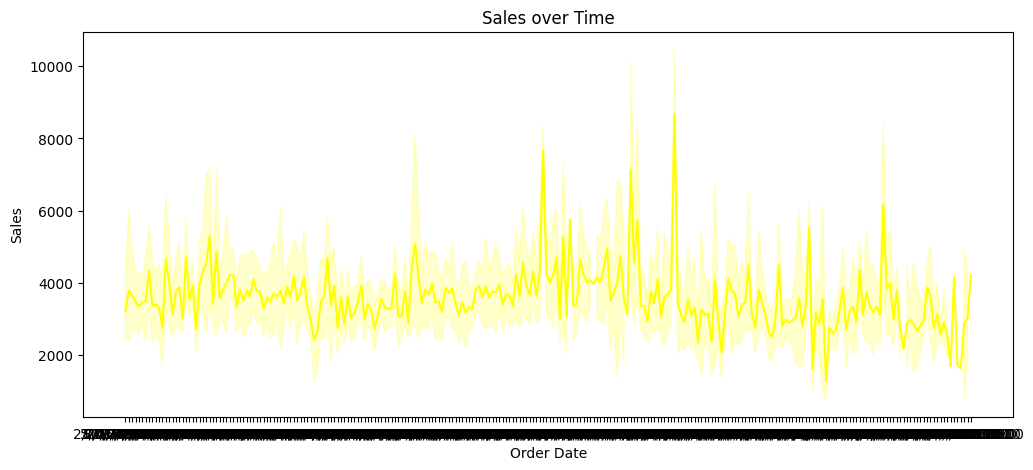

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(data=data, x='ORDERDATE', y='SALES', color='yellow')
plt.title("Sales over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()

## **Feature Engineering**

In [152]:
# Convert ORDERDATE to datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')

# Check for NaT values (in case of invalid dates)
if data['ORDERDATE'].isna().sum() > 0:
    print(f"⚠️ Warning: {data['ORDERDATE'].isna().sum()} invalid dates found and will be dropped.")
    data = data.dropna(subset=['ORDERDATE'])

# Now create time-based features
data['Month'] = data['ORDERDATE'].dt.month
data['Week'] = data['ORDERDATE'].dt.isocalendar().week
data['Day'] = data['ORDERDATE'].dt.day
data['Year'] = data['ORDERDATE'].dt.year

print("Feature engineering completed.\n")
data.head()

Feature engineering completed.



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Month,Week,Day,Year
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,10022,USA,NaN,Yu,Kwai,Small,2,9,24,2003
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,5,19,7,2003
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,7,27,1,2003
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,90003,USA,NaN,Young,Julie,Medium,8,35,25,2003
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,USA,NaN,Brown,Julie,Medium,10,41,10,2003


# **MODEL IMPLEMENTATION**

## **1) LINEAR REGRESSION**

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Trained with Improved Features")
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")

Linear Regression Model Trained with Improved Features
MSE: 0.17, MAE: 0.34, R2 Score: 0.44


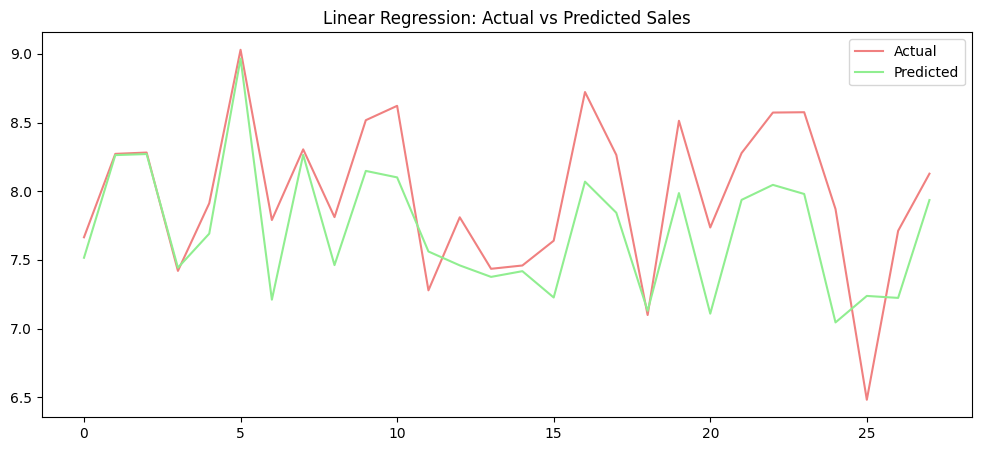

In [154]:
# Visualization
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual', color='lightcoral')
plt.plot(y_pred_lr, label='Predicted', color='lightgreen')
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.legend()
plt.show()

## **2) XGBOOST**

In [155]:
# XGBoost model with improved hyperparameters
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [156]:
# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Improved XGBoost Model Trained")
print(f"MSE: {mse_xgb:.2f}, MAE: {mae_xgb:.2f}, R2 Score: {r2_xgb:.2f}")

Improved XGBoost Model Trained
MSE: 0.11, MAE: 0.23, R2 Score: 0.64


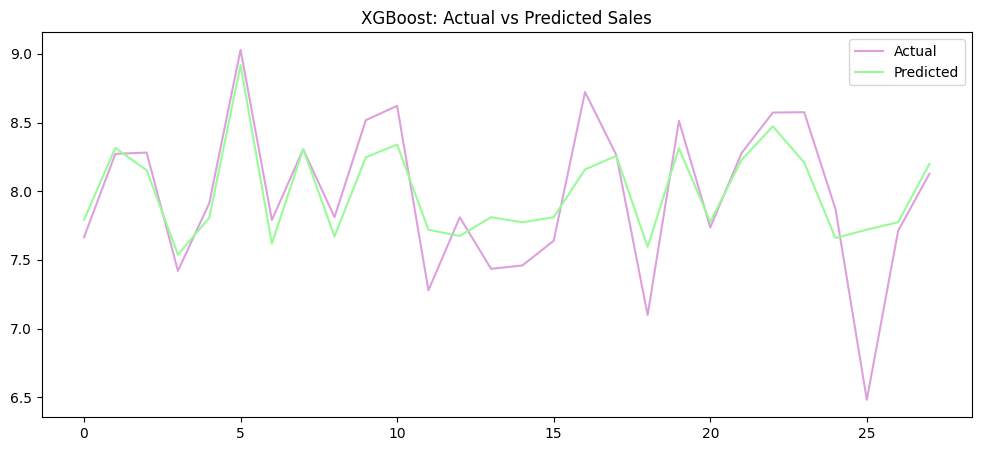

In [157]:
# Visualization
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual', color='plum')
plt.plot(y_pred_xgb, label='Predicted', color='palegreen')
plt.title("XGBoost: Actual vs Predicted Sales")
plt.legend()
plt.show()

## **3) LIGHTGBM**

In [158]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings('ignore')

### **Feature Engineering**

In [159]:
data = data.sort_values('ORDERDATE')

# Lag features 1-8
for lag in range(1, 9):
    data[f'Lag_{lag}'] = data['SALES'].shift(lag)

# Rolling averages
data['Rolling_Mean_3'] = data['SALES'].shift(1).rolling(3).mean()
data['Rolling_Mean_6'] = data['SALES'].shift(1).rolling(6).mean()

# Time-based features
data['Month'] = data['ORDERDATE'].dt.month
data['Week'] = data['ORDERDATE'].dt.isocalendar().week
data['Day'] = data['ORDERDATE'].dt.day
data['Year'] = data['ORDERDATE'].dt.year

# Categorical features
for cat in ['CITY','COUNTRY','DEALSIZE']:
    data[cat] = data[cat].astype('category').cat.codes

# Drop NaNs from lag/rolling
data = data.dropna()

### **Log-transform target**

In [160]:
data['Log_SALES'] = np.log1p(data['SALES'])

### **Features and Target**

In [161]:
features = ['Month','Week','Day','Year','CITY','COUNTRY','DEALSIZE'] + \
           [f'Lag_{i}' for i in range(1,9)] + ['Rolling_Mean_3','Rolling_Mean_6']
target = 'Log_SALES'

X = data[features]
y = data[target]

### **Time-based train/test split**

In [162]:
train_size = int(len(data)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### **Training LightGBM**

In [163]:
import warnings
warnings.filterwarnings('ignore')

# Train LightGBM Regressor
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 16
[LightGBM] [Info] Start training from score 8.039366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=6,
              n_estimators=1000, random_state=42, subsample=0.8)

In [164]:
# Predict and inverse log
y_pred = np.expm1(lgb_model.predict(X_test))
y_actual = np.expm1(y_test)

# Evaluation
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print("Professional LightGBM Model Trained")
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")

Professional LightGBM Model Trained
MSE: 1723311.19, MAE: 780.65, R2 Score: 0.55


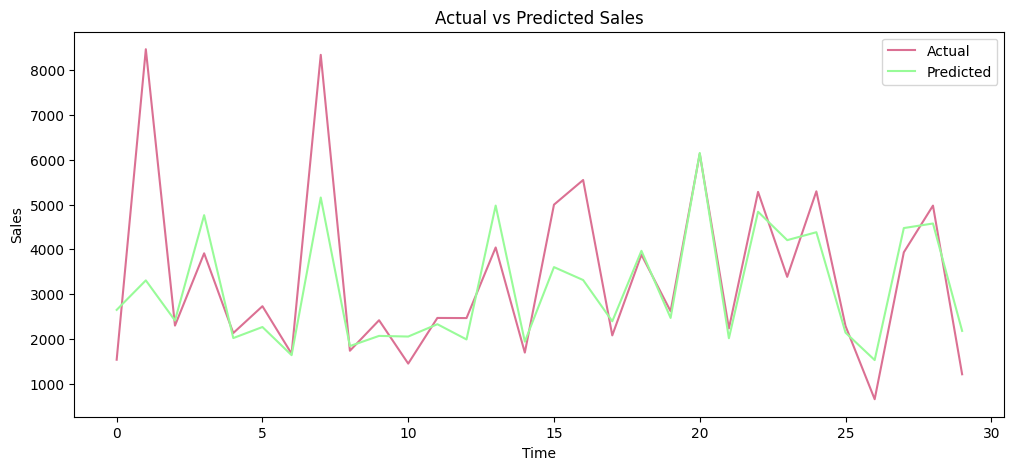

In [165]:
# Actual vs Predicted Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=y_actual.values, label='Actual', color='palevioletred')
sns.lineplot(data=y_pred, label='Predicted', color='palegreen')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

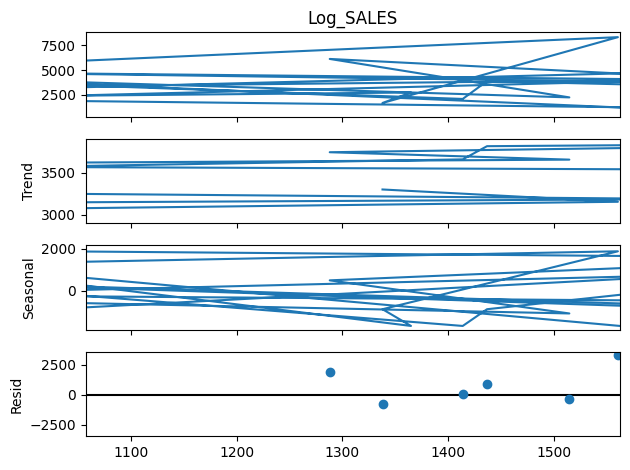

In [166]:
# 🔹 Bonus: Seasonal decomposition on train set
train_sales = y_actual[:train_size]
decompose = seasonal_decompose(train_sales, period=12, model='additive')
decompose.plot()
plt.show()

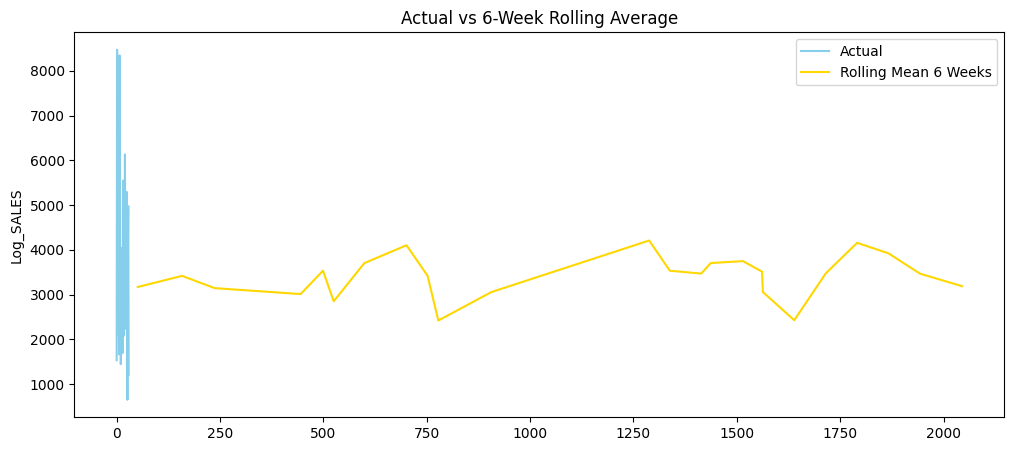

In [167]:
# Rolling mean vs Actual
plt.figure(figsize=(12,5))
sns.lineplot(data=y_actual.values, label='Actual', color='skyblue')
sns.lineplot(data=pd.Series(y_actual).rolling(6).mean(), label='Rolling Mean 6 Weeks', color='gold')
plt.title("Actual vs 6-Week Rolling Average")
plt.legend()
plt.show()

# **GRADIO DEPLYEMENT**

In [169]:
!pip install gradio --quiet

import gradio as gr
import pandas as pd
import numpy as np
from datetime import datetime


# Function to create features for a given date input
def create_features_for_date(input_date_str, model_choice):
    input_date = pd.to_datetime(input_date_str)

    # Time-based features
    Month = input_date.month
    Week = input_date.isocalendar()[1]
    Day = input_date.day
    Year = input_date.year

    # Lag & Rolling values (using last available data)
    last_data = data.sort_values('ORDERDATE').iloc[-8:]  # last 8 rows for lag

    lags = [last_data['SALES'].iloc[-i] for i in range(1,9)]
    rolling_mean_3 = np.mean(lags[-3:])
    rolling_mean_6 = np.mean(lags[-6:])

    # Categorical features (using most recent values)
    CITY = last_data['CITY'].iloc[-1]
    COUNTRY = last_data['COUNTRY'].iloc[-1]
    DEALSIZE = last_data['DEALSIZE'].iloc[-1]

    feature_vector = pd.DataFrame({
        'Month':[Month],
        'Week':[Week],
        'Day':[Day],
        'Year':[Year],
        'CITY':[CITY],
        'COUNTRY':[COUNTRY],
        'DEALSIZE':[DEALSIZE],
        'Lag_1':[lags[0]], 'Lag_2':[lags[1]], 'Lag_3':[lags[2]], 'Lag_4':[lags[3]],
        'Lag_5':[lags[4]], 'Lag_6':[lags[5]], 'Lag_7':[lags[6]], 'Lag_8':[lags[7]],
        'Rolling_Mean_3':[rolling_mean_3],
        'Rolling_Mean_6':[rolling_mean_6]
    })

    # Predict based on chosen model
    if model_choice == "Linear Regression":
        pred = lr_model.predict(feature_vector)[0]
    elif model_choice == "XGBoost":
        pred = xgb_model.predict(feature_vector)[0]
    else:  # LightGBM
        pred = np.expm1(lgb_model.predict(feature_vector))[0]  # inverse log

    return f"📊 Predicted Sales for {input_date_str} using {model_choice}: {pred:,.2f}"

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("<h1 style='color:darkred;'>🛒 Walmartino Sales Forecasting Tool</h1>")
    gr.Markdown("<h3 style='color:darkblue;'>Choose a model and input a date to predict sales</h3>")

    with gr.Row():
        date_input = gr.Textbox(label="📅 Enter Date (YYYY-MM-DD)", placeholder="2025-08-25")
        model_input = gr.Dropdown(choices=["Linear Regression","XGBoost","LightGBM"],
                                  value="LightGBM", label="🧠 Choose Model")

    output = gr.Textbox(label="💡 Prediction Output")

    predict_btn = gr.Button("Predict Sales")

    predict_btn.click(fn=create_features_for_date,
                      inputs=[date_input, model_input],
                      outputs=output)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://33613dc97586e506a7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
